<a href="https://colab.research.google.com/github/MikhaelAngeloo/MikhaelAngeloo/blob/main/System_Biology_exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# exercise 1 2 3

# import numpy for the array (matrix input and output)
import numpy as np

# input matrix
inputData =  np.array([[0, 0, 1],
                       [0, 1, 1],
                       [1, 0, 1],
                       [1, 1, 1]])
# referenceoutput matrix
referenceOutput = np.array([[0,0,0,1]]).T

# set random as 1 so that the output is the same (given the seed and input is the same)
np.random.seed(1)
# training number set to 40k so the output match the reference data
trainingNumber = 40000
# Sigmoid function coded with numpy
def sigmoid(x):
  return 1 / (1 + np.exp(-x)) # sigmoid activation formula

# Calculate the slope by using hte derrivative of sigmoid function (backpropagation)
def sigmoidSlope(x):
  return x * (1-x)

# Weights of the synapses connecting input and output layer are randomly initialized with mean 0
weights01 = 2*np.random.random((3,1)) - 1

# for iteration until trainingnumber
for i in range(trainingNumber):

  # Set the the input data for simple forward propagation (xi)
  inputLayer = inputData

  # Apply Sigmoid Function to the dot product of two arrays 
  # Forward propagation
  outputPerceptronLayer = sigmoid(np.dot(inputLayer, weights01))

  # The difference between the ouput perceptron Layer and the reference ouput
  outputError = referenceOutput - outputPerceptronLayer
  
  # The difference between referencee (outputError) output multipilied by the slope
  # of the sigmoid functino at value of the ouput perceptron Layer
  outputDelta = outputError * sigmoidSlope(outputPerceptronLayer)

  # Updating the weights
  # dont use += np.dot(inputLayer.T, outputDelta)
  # ValueError: non-broadcastable output operand with shape (3,1) doesn't match the broadcast shape (3,4)
  weights01 = weights01 + np.dot(inputLayer.T, outputDelta)

# Rounding up for two decimal points to check
outputPerceptronLayer = np.round(outputPerceptronLayer, decimals=2)
# print output
print("Output values after" + str(trainingNumber) + " training iterations:")
print(outputPerceptronLayer)

Output values after100000 training iterations:
[[0.  ]
 [0.01]
 [0.01]
 [0.99]]


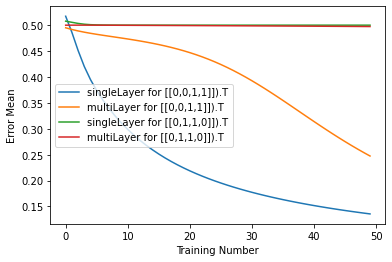

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""

"""

import numpy as np
import matplotlib.pyplot as plt

inputData = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]]) #input data


# Sigmoid function coded with Numpy
# This is the forward pro
def sigmoid(x):
    return 1/(1+np.exp(-x))

#Calculate the slope by using the derivative of the sigmoid function
def sigmoidSlope(x):
    return x*(1-x)

np.random.seed(1) #set a seed of 1 for the random function

trainingNumber = 50 #training number set to 900

def singleLayer(referenceOutput):
    y = [] #intializing for storing the outputErrorOccured
    
    weights = 2*np.random.random((3,1)) - 1 #weigths function

    for i in range(trainingNumber): #making a loop to go make it go through 900 iterations
    
        #Set the input data for simple forward propagation
        inputLayer = inputData
        
        #Apply Sigmoid Function to the dot product of two arrays / forward propogation
        outputPerceptronLayer = sigmoid(np.dot(inputLayer, weights))
        
        #The difference between the ouput perceptron Layer and the reference ouput
        outputError = referenceOutput - outputPerceptronLayer
        
        #The difference between referencee (outputError) output multipilied by the slope
        #of the sigmoid functino at value of the ouput perceptron Layer
        outputDelta = outputError * sigmoidSlope(outputPerceptronLayer)
        #Updating the weights / backward propogation
        weights += np.dot(inputLayer.T, outputDelta)
         
        #rounding up for two decimal points
        #outputRounded = np.round(outputPerceptronLayer, decimals=2)
        
        outputErrorOccured = np.mean(np.abs(outputError))
        
        y.append(outputErrorOccured) #for storing the outputErrorOccured

    x = [i for i in range(trainingNumber)] #setting x for the graph
    return plt.plot(x, y) #data for making the graph

def multiLayer(referenceOutput):
    y = [] #intializing for storing the outputErrorOccured
    
    #Random initial weights for syapses from input to first hidden layer
    weights01 = 2*np.random.random((3,4))-1
    #Random initial weights for synapses from first hidden layer to output layer
    weights02 = 2*np.random.random((4,1))-1
    
    for j in range(trainingNumber): #making a loop to go make it go through 900 iterations
    
        #Set the input data for simple forward propagation
        inputLayer = inputData 
        hiddenLayer = sigmoid(np.dot(inputLayer,weights01)) 
        outputPerceptronLayer = sigmoid(np.dot(hiddenLayer, weights02)) 
        
        #The difference between the ouput perceptron Layer and the reference ouput
        outputError = referenceOutput - outputPerceptronLayer
      
        #The divergence from the reference output (outputError) multiplied
        #by the slope of the sigmoid function at value of the output perceptron Layer
        outputDelta = outputError * sigmoidSlope(outputPerceptronLayer) 
        
        #How much of the output error can be attributed to the
        #hidden Layer values (based on the weights)?
        #This line is the implementation of backpropagation
        hiddenLayerError = outputDelta.dot(weights02.T)
        
        #The error contributed by the hidden Layer (hiddenLayerError) multiplied
        #byt the slope of the sigmoid function at value of the hidden Layer
        hiddenLayerDelta = hiddenLayerError * sigmoidSlope(hiddenLayer)
        
        #Updating the weights / backward propogation
        weights02 += hiddenLayer.T.dot(outputDelta)
        weights01 += inputData.T.dot(hiddenLayerDelta)
        
        outputErrorOccured = np.mean(np.abs(outputError))
    
        #outputRounded = np.round(outputPerceptronLayer, decimals=2)
        
        y.append(outputErrorOccured) #for storing the outputErrorOccured
    
    x = [i for i in range(trainingNumber)] #setting x for the graph
    return plt.plot(x, y) #data for making the graph

line1, = singleLayer(np.array([[0,0,1,1]]).T) #making graph line1 using function singleLayer and referenceoutput '[[0,0,1,1]]).T'
line2, = multiLayer(np.array([[0,0,1,1]]).T) #making graph line2 using function multipleLayer and referenceoutput '[[0,0,1,1]]).T'
line3, = singleLayer(np.array([[0,1,1,0]]).T) #making graph line3 using function singleLayer and referenceoutput '[[0,1,1,0]]).T'
line4, = multiLayer(np.array([[0,1,1,0]]).T) #making graph line4 using function multipleLayer and referenceoutput '[[0,1,1,0]]).T'
plt.legend([line1,line2,line3,line4], ['singleLayer for [[0,0,1,1]]).T', 'multiLayer for [[0,0,1,1]]).T', 'singleLayer for [[0,1,1,0]]).T', 'multiLayer for [[0,1,1,0]]).T']) #labeling 
plt.ylabel("Error Mean") #labeling Y as the "error mean" which inside the code was used from 'outputErrorOccured'
plt.xlabel("Training Number") #labeling X as the "training number" 
plt.show() #show the graph


In [ ]:
# Q 2
# import numpy for the array (matrix input and output)
import numpy as np


# input matrix
inputData =  np.array([[0, 0, 1],
                       [0, 1, 1],
                       [1, 0, 1],
                       [1, 1, 1]])
# referenceoutput matrix
referenceOutput = np.array([[0,0,1,1]]).T

# weight; for affecting the slope, since it affects how much the graph leans to left or right
# in this case it is 2, which means that the graph will get steeper
# while 0.5 will make it more flatter and less vertical
k1 = 2
k2 = 0.5
# set random seed as 42 so weight01 and weight02 have consistent values
np.random.seed(2)
# training number set to 40k so the output match the reference data
trainingNumber = 40000

# Sigmoid function coded with numpy
# this is the sigmoid activation formula for forward propagation
# as x is multiplied with either 0.5 or 2 the graph will get less steep or more steep
# The trainingNumber (k) will also get affected when the graph changes
# the more steep it is the less k will be and vice versa.
# which means k when it is sigmoid(2x) will be around 20000ish
def sigmoid(x):
  return 1 / (1 + np.exp(-x) * k1) # sigmoid activation formula

# Calculate the slope by using hte derrivative of sigmoid function (backpropagation)
def sigmoidSlope(x):
  return x * (1-x)

# Weights of the synapses connecting input and output layer are randomly initialized with mean 0
weights01 = 2*np.random.random((3 , 1)) - 1

for i in range(trainingNumber):

  # Set the the input data for simple forward propagation (xi)
  inputLayer = inputData

  # Apply Sigmoid Function to the dot product of two arrays 
  # Forward propagation
  outputPerceptronLayer = sigmoid(np.dot(inputLayer, weights01))

  # The difference between the ouput perceptron Layer and the reference ouput
  outputError = referenceOutput - outputPerceptronLayer
  
  # The difference between referencee (outputError) output multipilied by the slope
  # of the sigmoid functino at value of the ouput perceptron Layer
  outputDelta = outputError * sigmoidSlope(outputPerceptronLayer)

  # Updating the weights
  # dont use += np.dot(inputLayer.T, outputDelta)
  # ValueError: non-broadcastable output operand with shape (3,1) doesn't match the broadcast shape (3,4)
  weights01 = weights01 + np.dot(inputLayer.T, outputDelta)

# Rounding up for two decimal points to check
outputPerceptronLayer = np.round(outputPerceptronLayer, decimals=2)
# print output
print("Output values after " + str(trainingNumber) + " training iterations:")
print(outputPerceptronLayer)



Output values after 40000 training iterations:
[[0.]
 [0.]
 [1.]
 [1.]]


Output values after 900 training iterations:
[[0.]
 [0.]
 [1.]
 [1.]]


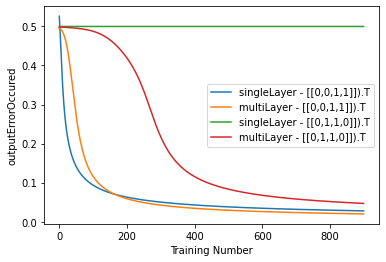

<Figure size 432x288 with 0 Axes>

In [ ]:

import numpy as np # for matrix
import matplotlib.pyplot as plt # for plotting

# input matrix
inputData = np.array([[0,0,1],
                      [0,1,1],
                      [1,0,1],
                      [1,1,1]]) 

# Sigmoid function coded with Numpy
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Calculate the slope by using the derivative of the sigmoid function
def sigmoidSlope(x):
    return x * (1 - x)

np.random.seed(42) # 42 so weight01 and weight02 get consistent valuees

trainingNumber = 900 # training number set to 900

x = [i for i in range(trainingNumber)] # x value for plot later (until 900)

# singlelayer function
def singleLayer(referenceOutput):
    y = [] #intializing for storing the outputErrorOccured
    
    weights = 2*np.random.random((3,1)) - 1 # weights

    for i in range(trainingNumber): # loop until 900 (traininingNumber)
    
        # Set the input data for simple forward propagation
        inputLayer = inputData
        
        # Apply Sigmoid Function to the dot product of two arrays 
        # Forward propagation
        outputPerceptronLayer = sigmoid(np.dot(inputLayer, weights))
        
        #The difference between the ouput perceptron Layer and the reference ouput
        outputError = referenceOutput - outputPerceptronLayer
        
        # The difference between referencee (outputError) output multipilied by the slope
        # of the sigmoid function at value of the ouputperceptronLayer
        outputDelta = outputError * sigmoidSlope(outputPerceptronLayer)
        # Updating the weights 
        weights += np.dot(inputLayer.T, outputDelta)
         
        # counter-based loop
        outputErrorOccured = np.mean(np.abs(outputError))
        
        # append values from outputErrorOccured
        y.append(outputErrorOccured) 

    
    return plt.plot(x, y) # for plotting (x, y)

#multilayer function
def multiLayer(referenceOutput):
    y = [] #intializing for storing the outputErrorOccured
    
    # Random initial weights for syapses from input to first hidden layer
    weights01 = 2*np.random.random((3,4))-1

    # Random initial weights for synapses from first hidden layer to output layer
    weights02 = 2*np.random.random((4,1))-1
    
    for j in range(trainingNumber): #making a loop to go make it go through 900 iterations
    
        # Set the input data for all layers as forward propagation
        inputLayer = inputData 
        hiddenLayer = sigmoid(np.dot(inputLayer,weights01)) 
        outputPerceptronLayer = sigmoid(np.dot(hiddenLayer, weights02)) 
        
        # The difference between the output perceptron Layer and the reference ouput
        outputError = referenceOutput - outputPerceptronLayer
      
        # The divergence from the reference output (outputError) multiplied
        # by the slope of the sigmoid function at value of the output perceptron Layer
        outputDelta = outputError * sigmoidSlope(outputPerceptronLayer) 
        
        #How much of the output error can be attributed to the
        #hidden Layer values (based on the weights)?
        #This line is the implementation of backpropagation
        hiddenLayerError = outputDelta.dot(weights02.T)
        
        # How much of the output error can be attributed to the
        # hidden layer values (based on the weights)
        # This line i s the implementation of the backpropagation
        hiddenLayerDelta = hiddenLayerError * sigmoidSlope(hiddenLayer)
        
        # The error contributed by the hidden layer (hiddenlayerError) multiplied
        # by the slope of the sigmoid function at the value of the hidden layer
        weights02 += hiddenLayer.T.dot(outputDelta)
        weights01 += inputData.T.dot(hiddenLayerDelta)
        
        # the mean error
        outputErrorOccured = np.mean(np.abs(outputError))
          
        # save plot 4 as png
        y.append(outputErrorOccured) 
    
    
    
    return plt.plot(x, y) # data for the plot 

print("Output values after " + str(trainingNumber) + " training iterations:")
print(np.round(outputPerceptronLayer))
'''
plot1 = singleLayer(np.array([[0,0,1,1]]).T) # plot1 from the fuunction singleLayer and referenceoutput=[[0,0,1,1]]).T
plt.legend([plot1], ['singlelayer - [0,0,1,1].T']) # plotting legend
plt.ylabel("outputErrorOccured") # labeling Y with the outputErrorOccured (Error Mean)
plt.xlabel("Training Number") # labeling X with training number
plt.show() # show plot 1
plt.savefig('plot1.png') # save plot 1 as png

plot2 = multiLayer(np.array([[0,0,1,1]]).T) # plot2 from the function multiLayer and referenceoutput=[[0,0,1,1]]).T
plt.legend([plot1], ['singlelayer - [0,0,1,1].T']) # plotting legend
plt.ylabel("outputErrorOccured") # labeling Y with the outputErrorOccured (Error Mean)
plt.xlabel("Training Number") # labeling X with training number
plt.show() # show plot 2
plt.savefig('plot2.png') # save plot 2 as png

plot3 = singleLayer(np.array([[0,1,1,0]]).T) #plot3 from the function singleLayer and referenceoutput=[[0,1,1,0]]).T
plt.legend([plot1], ['singlelayer - [0,0,1,1].T']) # plotting legend
plt.ylabel("outputErrorOccured") # labeling Y with the outputErrorOccured (Error Mean)
plt.xlabel("Training Number") # labeling X with training number 
plt.show() # show plot 3
plt.savefig('plot3.png') # save plot 3 as png

plot4 = multiLayer(np.array([[0,1,1,0]]).T) # plot4 from function multiLayer and referenceoutput=[[0,1,1,0]]).T
plt.legend([plot1], ['singlelayer - [0,0,1,1].T']) # plotting legend
plt.ylabel("outputErrorOccured") # labeling Y with the outputErrorOccured (Error Mean)
plt.xlabel("Training Number") # labeling X with training number
plt.show() # show plot 4
plt.savefig('plot4.png') # save plot 4 as png
'''

plot1, = singleLayer(np.array([[0,0,1,1]]).T) # plot1 from the fuunction singleLayer and referenceoutput=[[0,0,1,1]]).T
plot2, = multiLayer(np.array([[0,0,1,1]]).T) # plot2 from the function multiLayer and referenceoutput=[[0,0,1,1]]).T
plot3, = singleLayer(np.array([[0,1,1,0]]).T) #plot3 from the function singleLayer and referenceoutput=[[0,1,1,0]]).T
plot4, = multiLayer(np.array([[0,1,1,0]]).T) # plot4 from function multiLayer and referenceoutput=[[0,1,1,0]]).T
plt.legend([plot1,plot2,plot3,plot4], ['singleLayer - [[0,0,1,1]]).T', 'multiLayer - [[0,0,1,1]]).T', 'singleLayer - [[0,1,1,0]]).T', 'multiLayer - [[0,1,1,0]]).T']) #label

plt.ylabel("outputErrorOccured") # labeling Y with the outputErrorOccured (Error Mean)
plt.xlabel("Training Number") # labeling X with training number
plt.show() # show plot 4
plt.savefig('plots.png')

2
num_particles: 150
15
15
15.440484418872725
15.221374564635271
15.339849337791927
15.388899917398554
15.359000293051675
15.391933834637529
15.359000293051675
15.391933834637529
15.359000293051675
15.391933834637529
15.359000293051675
15.391933834637529
15.359000293051675
15.391933834637529
15.359000293051675
15.391933834637529
15.359000293051675
15.391933834637529
15.359000293051675
15.391933834637529
15.359000293051675
15.391933834637529
15.374680287922677
15.342896430369228
0.5028694560943405
16.316765190995298
-7.212981317855391
15.03859991388938
-8.081058972498326
15.961720437815789
-8.081058972498326
15.961720437815789
-7.91957656027504
15.694802119564887
-7.91957656027504
15.694802119564887
-7.91957656027504
15.694802119564887
-7.91957656027504
15.694802119564887
-8.120745166017517
15.360536744776304
-8.120745166017517
15.360536744776304
-8.120745166017517
15.360536744776304
-9.063144172069102
-3.3280821007096275
-9.13383811927953
-4.909897912589969
-10.091872342504804
-8.97537

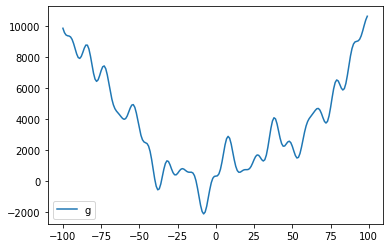

In [ ]:
import math #importing maath package
import random #importing random package
import matplotlib.pyplot as plt #importing math package

def errorFunction(x): #simple function to optimize by function 1
    return sum([15*math.sin(x[i]/5)**2 * 75*math.cos(x[i]/13) *  3*math.sin(x[i]/7)+ x[i]**2 + 300 for i in range(len(x))])
    #return sum([50 * math.sin(x[i])+ (x[i])**2 + 100 for i in range(len(x))]) #exercise3
    #return sum([5 * (x[i] - 20)**2 for i in range(len(x))]) # expected minimum is 0 and its corresponding x would be 20 

#a class of a computer agent, here also called 'particle'
class individualParticle:
    def __init__ (self,x0):
        self.individualPosition = [] #setting individual position with an empty list
        self.individualVelocity = []  #setting individual velocity with an empty list
        self.individualBestPosition = []  #setting individual best position with an empty list
        self.individualBestError = -1  #initializing individual best error as -1 
        self.individualError = -1 #initializing individual error as -1 
        
        for i in range(0, numStartingLocation): #for i starting from 0 to numStartingLocation
            self.individualVelocity.append(random.uniform(-1,1)) #individual velocity is appended with random x*y (=-1*1)
            self.individualPosition.append(x0[1]) #individual position is appened starting from the first position in x0
    
    #evaluate the current fitness of the computer agents
    def evaluate(self, costFunction): 
        self.individualError = costFunction(self.individualPosition) 
        # -1 = cos (individual position) f
        #for this individual position should be bounds of (⍺,0) or (-⍺,0)
        
        #the current position of the agent is compared with the indivudal best and updated if necessary
        if self.individualError < self.individualBestError or self.individualBestError == -1: 
            #if individual error is less than when, 
            #(if individual error is not -1 and less than that) or (if individual best error is -1)
            self.individualBestPosition = self.individualPosition #invidual best position gets equal with individual position 
            self.individualBestError =  self.individualError #indiviudal best error gets equal with individual error
            
    #calculate the new agent's velocity
    def update_velocity(self, groupsBestPosition):
        w = 1.0 #inertia weight of previous velocity
        c1 = 1 #congnitive constant (distance from the individual's known best position)
        c2 = 2 #social constant(distance from the group's known best position)
        
        #random numbers to compensate for cognitive and social constants
        #random.seed(20)
        for i in range(0, numStartingLocation):
            r1 = random.random()
            r2 = random.random()
            
            #updating cognitive velocity and social velocity
            cognitiveVelocity = c1 * r1 * (self.individualBestPosition[i] - self.individualPosition[i])
            socialVelocity = c2 * r2 * (groupsBestPosition[i] - self.individualPosition[i])
            self.individualVelocity[i] = w * self.individualVelocity[i] + cognitiveVelocity + socialVelocity
        
    #update the position of each agent based on the new velocity updates
    def positionUpdate(self, bounds):
        for i in range(0, numStartingLocation):
            self.individualPosition[i] = self.individualPosition[i] + self.individualVelocity[i]
            #compensate maximum position?
            if self.individualPosition[i] > bounds[i][1]:
                self.individualPosition[i] = bounds[i][1]
            #compensate minimum position?
            if self.individualPosition[i] < bounds[i][0]:
                self.individualPosition[i] = bounds[i][0]
                
def particleSwarmOptimization(costFunction, x0, bounds, num_particles, maxiter):
    #initialize the swarm
    global numStartingLocation
    numStartingLocation = len(x0)
    print(numStartingLocation)
    bestGroupError = -1
    groupsBestPosition = []
    swarm = []
    
    print("num_particles:", num_particles)
        
    for i in range(0, num_particles):
        swarm.append(individualParticle(x0))
        
    #loop to start the optimizatino process
    for i in range(0,maxiter):
        #evaluate each agent's fitness
        for j in range(0,num_particles):
            swarm[j].evaluate(costFunction)
                
            #which agent has the best position (minimum error) in the swarm?
            if swarm[j].individualError < bestGroupError or bestGroupError == -1:
                groupsBestPosition = list(swarm[j].individualPosition)
                bestGroupError = float(swarm[j].individualError)
        #update velocities and positions inside the swarm      
        for j in range(0, num_particles):
            swarm[j].update_velocity(groupsBestPosition)
            swarm[j].positionUpdate(bounds)
            
        for j in range(0, len(groupsBestPosition)):
            print(groupsBestPosition[j])

    #print the final results with error
    print('After running the swwarm of computer agents, the groups\'s best position is ' +
          str(groupsBestPosition) + " with an error of " + str(bestGroupError))
            
initialStartingPosition = [-15,15] # initial starting location [x1,x2...]
#minMaxBounds = [(-30,30), (-100,1500)]
minMaxBounds = [(-10000,10000), (-10000,10000)] # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
particleSwarmOptimization(errorFunction, initialStartingPosition, minMaxBounds, num_particles = 150, maxiter = 30) #maxiter is the iteration
x = [i for i in range(-100,100)] #setting x for the graph
#y = [5 * (x[i] - 20)**2 for i in range(len(x))]
y = [15*math.sin(x[i]/5)**2 * 75*math.cos(x[i]/13) *  3*math.sin(x[i]/7)+ x[i]**2 + 300 for i in range(len(x))]
#y = [50 * math.sin(x[i])+ (x[i])**2 + 100 for i in range(len(x))]
line1, = plt.plot(x,y)
plt.legend([line1], "g(x)")
plt.show()

In [ ]:

import math #importing math package
import random #importing random package
import matplotlib.pyplot as plt #importing mathplot package for graph

def errorFunction(x): #simple function to optimize by function 1
    return sum([5 * (x[i] - 20)**2 for i in range(len(x))])  #function f(x)
    '''   
    exercise 2: 
    expected minimum is 0 and its corresponding x would be 20 
    '''
#a class of a computer agent, here also called 'particle'
class individualParticle:
    def __init__ (self,x0):
        self.individualPosition = [] #setting individual position with an empty list
        #exercise 1
        self.individualVelocity = []  #setting individual velocity with an empty list
        self.individualBestPosition = []  #setting individual best position with an empty list
        self.individualBestError = -1  #initializing individual best error as -1 
        self.individualError = -1 #initializing individual error as -1 
        
        for i in range(0, numStartingLocation): #for i starting from 0 to numStartingLocation
            self.individualVelocity.append(random.uniform(-1,1)) #individual velocity is appended with random x*y (=-1*1)
            self.individualPosition.append(x0[1]) #individual position is appened starting from the first position in x0
    
    #evaluate the current fitness of the computer agents
    def evaluate(self, costFunction): 
        self.individualError = costFunction(self.individualPosition) 
        # -1 = cos (individual position) f
        #for this individual position should be bounds of (⍺,0) or (-⍺,0)
        
        #the current position of the agent is compared with the indivudal best and updated if necessary
        if self.individualError < self.individualBestError or self.individualBestError == -1: 
            #if individual error is less than individual best error or is equal to -1
            self.individualBestPosition = self.individualPosition #invidual best position gets equal with individual position 
            self.individualBestError =  self.individualError #indiviudal best error gets equal with individual error
            
    #calculate the new agent's velocity
    def update_velocity(self, groupsBestPosition):
        w = 0.5 #inertia weight of previous velocity
        c1 = 1 #congnitive constant (distance from the individual's known best position)
        c2 = 2 #social constant(distance from the group's known best position)
        
        #random numbers to compensate for cognitive and social constants
        for i in range(0, numStartingLocation): #i in range of 0 to numStartingLocation
            r1 = random.random() #get random number
            r2 = random.random() #get random number
            
            #updating cognitive velocity and social velocity
            '''
            exercise 3:
            if a value is stuck at a certain local minimum and can not get out, 
            then particles with low velocity have difficulties finding the global minimum
            even after an increased number of iterations.
            I could solve this by creating a bias on the code with a number that is not to big or small
            Such as number '1' and added it for the cognitiveVelocity and socialVelocity
            '''
            cognitiveVelocity = (c1 * r1 * (self.individualBestPosition[i] - self.individualPosition[i])) + 1 #cognitiveVelocity + 1
            socialVelocity = (c2 * r2 * (groupsBestPosition[i] - self.individualPosition[i])) + 1 #socialVelocity + 1
            self.individualVelocity[i] = w * self.individualVelocity[i] + cognitiveVelocity + socialVelocity #then individualVelocity is summation of all the values above
        
    #update the position of each agent based on the new velocity updates
    def positionUpdate(self, bounds):
        for i in range(0, numStartingLocation): #for i in range of 0 to numStartingLocation
            self.individualPosition[i] = self.individualPosition[i] + self.individualVelocity[i] #indiviidualpostition is individual position plus individual velocity
            #compensate maximum position?
            if self.individualPosition[i] > bounds[i][1]: #if a position is bigger then the bound
                self.individualPosition[i] = bounds[i][1] #it is substituted to the bound
            #compensate minimum position?
            if self.individualPosition[i] < bounds[i][0]: #if a position is smaller then the bound
                self.individualPosition[i] = bounds[i][0] #it is substituted to the bound
                
def particleSwarmOptimization(costFunction, x0, bounds, num_particles, maxiter): 
    #initialize the swarm
    global numStartingLocation #making numStartingLocation global in order to be able to use it outside the function
    numStartingLocation = len(x0) #starting location of the number
    print(numStartingLocation) #printingout the numStartingLocation
    bestGroupError = -1 #initalize the best group error as -1
    groupsBestPosition = [] #making an empty list for the groups best position
    swarm = [] #making an empty list for the groups best postition
    
    print("num_particles:", num_particles) #printing out the num particles
        
    for i in range(0, num_particles): #i in range of 0 to num particles
        swarm.append(individualParticle(x0)) #append the lisit of individual particle
        
    #loop to start the optimization process
    for i in range(0,maxiter): #i in range of 0 to maxiter
        #evaluate each agent's fitness
        for j in range(0,num_particles): #i in range of 0 to num particles
            swarm[j].evaluate(costFunction) #for swarm in position of [j] evaluate the cos function
                
            #which agent has the best position (minimum error) in the swarm?
            if swarm[j].individualError < bestGroupError or bestGroupError == -1: #if swarm in position of [j] is smaller then the best group error or best group error is -1
                groupsBestPosition = list(swarm[j].individualPosition) #groups best position is list of individiual position of swarm in position of [j]
                bestGroupError = float(swarm[j].individualError) #best group error is a float of individual error of swarm in position of [j]
        #update velocities and positions inside the swarm      
        for j in range(0, num_particles): #i in range of 0 to num particles
            swarm[j].update_velocity(groupsBestPosition) #update swarm [j] position with velocity of groups best position
            swarm[j].positionUpdate(bounds) #update swarm [j] position with bounds
            
        for j in range(0, len(groupsBestPosition)): #i in range of 0 to groups best position
            print(groupsBestPosition[j]) #print out the groups best position 

    #print the final results with error
    print('After running the swarm of computer agents, the groups\'s best position is ' +
          str(groupsBestPosition) + " with an error of " + str(bestGroupError)) 
            
initialStartingPosition = [-15,15] # initial starting location [x1,x2...]
minMaxBounds = [(-100,100), (-100,100)] # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
'''
exercise 4:
All real numbers are the possible solution space
Local munimum is the global minum which is at x = 20
The minimum value is 0, but there is no maximum value.
'''
particleSwarmOptimization(errorFunction, initialStartingPosition, minMaxBounds, num_particles = 150, maxiter = 30) #maxiter is the iteration
x = [i for i in range(10,40)] #setting x for the graph
y = [5 * (x[i] - 20)**2 for i in range(len(x))] #setting y for the graph
line1, = plt.plot(x,y) #setting up the plot for the function
plt.legend([line1], "f(x)") #lenged the function 
plt.show() #showing the graph

In [ ]:
import math # for math
import random # for random
import matplotlib.pyplot as plt # importing mathplot package for graph

# simple function to optimize
def errorFunction(x):
  return sum([5 * (x[i] - 20)**2 for i in range(len(x))]) # formula of f(x) (function1)

# A class of a computer agent, here also called 'particle'
class individualParticle:
  def __init__ (self, x0):
    self.individualPosition = []
    self.individualVelocity = []  #setting individual velocity with an empty list
    self.individualBestPosition = []  #setting individual best position with an empty list
    self.individualBestError = -1  #initializing individual best error as -1 
    self.individualError = -1 #initializing individual error as -1 
    # Exercise 1

    for i in range(0, numStartingLocation): # for i starting from 0 to numStartingLocation
      self.individualVelocity.append(random.uniform(-1,1)) # individual velocity is appended with random x*y (=-1*1)
      self.individualPosition.append(x0[1]) # individual position is appened starting from the first position in x0

  def evaluate(self, costFunction): 
    self.individualError = costFunction(self.individualPosition)

    if self.individualError < self.individualBestError or self.individualBestError == -1: 
      # if individual error is less than individual best error or is equal to -1
      self.individualBestPosition = self.individualPosition # invidual best position gets equal with individual position 
      self.individualBestError =  self.individualError # indiviudal best error gets equal with individual error

  # calculate the new agent's velocity
  def update_velocity(self, groupsBestPosition):
    w = 0.5 # inertia weight of previous velocity
    c1 = 1 # congnitive constant (distance from the individual's known best position)
    c2 = 2 # social constant(distance from the group's known best position)

  # calculate the new agent's velocity
  def update_velocity(self, groupsBestPosition):
    w = 0.5 #inertia weight of previous velocity
    c1 = 1 #congnitive constant (distance from the indi
    c2 = 2 #social constant(distance from the group's known best position)
      
    # random numbers to compensate for cognitive and social constants
    for i in range(0, numStartingLocation): #i in range of 0 to numStartingLocation
      r1 = random.random() # get random number for r1
      r2 = random.random() # get random number for r2
      # Updating cognitive velocity and social velocity
      cognitiveVelocity = (c1 * r1 * (self.individualBestPosition[i] - self.individualPosition[i])) + 1 #cognitiveVelocity + 1
      socialVelocity = (c2 * r2 * (groupsBestPosition[i] - self.individualPosition[i])) + 1 #socialVelocity + 1
      self.individualVelocity[i] = w * self.individualVelocity[i] + cognitiveVelocity + socialVelocity #then individualVelocity is summation of all the values above

  # Update the position of each agent based on the new velocity updates
  def positionUpdate(self, bounds):
    for i in range(0, numStartingLocation): #for i in range of 0 to numStartingLocation
      self.individualPosition[i] = self.individualPosition[i] + self.individualVelocity[i] #indiviidualpostition is individual position plus individual velocity
      # Compensate maximum position?
      if self.individualPosition[i] > bounds[i][1]: #if a position is bigger then the bound
        self.individualPosition[i] = bounds[i][1] #it is substituted to the bound
      # Compensate minimum position?
      if self.individualPosition[i] < bounds[i][0]: #if a position is smaller then the bound
        self.individualPosition[i] = bounds[i][0] #it is substituted to the bound
              

def particleSwarmOptimization(costFunction, x0, bounds, num_particles, maxiter): 
    # Initialize the swarm
    global numStartingLocation # making numStartingLocation global in order to be able to use it outside the function
    numStartingLocation = len(x0) # starting location of the number
    print(numStartingLocation) # printingout the numStartingLocation
    bestGroupError = -1 # initalize the best group error as -1
    groupsBestPosition = [] # making an empty list for the groups best position
    swarm = [] # making an empty list for the groups best postition
    
    print("num_particles:", num_particles) #printing out the num particles
        
    for i in range(0, num_particles): #i in range of 0 to num particles
        swarm.append(individualParticle(x0)) #append the lisit of individual particle
        
    #loop to start the optimization process
    for i in range(0,maxiter): #i in range of 0 to maxiter
        #evaluate each agent's fitness
        for j in range(0,num_particles): #i in range of 0 to num particles
            swarm[j].evaluate(costFunction) #for swarm in position of [j] evaluate the cos function
                
            #which agent has the best position (minimum error) in the swarm?
            if swarm[j].individualError < bestGroupError or bestGroupError == -1: #if swarm in position of [j] is smaller then the best group error or best group error is -1
                groupsBestPosition = list(swarm[j].individualPosition) #groups best position is list of individiual position of swarm in position of [j]
                bestGroupError = float(swarm[j].individualError) #best group error is a float of individual error of swarm in position of [j]
        #update velocities and positions inside the swarm      
        for j in range(0, num_particles): #i in range of 0 to num particles
            swarm[j].update_velocity(groupsBestPosition) #update swarm [j] position with velocity of groups best position
            swarm[j].positionUpdate(bounds) #update swarm [j] position with bounds
            
        for j in range(0, len(groupsBestPosition)): #i in range of 0 to groups best position
            print(groupsBestPosition[j]) #print out the groups best position 

    #print the final results with error
    print('After running the swarm of computer agents, the groups\'s best position is ' +
          str(groupsBestPosition) + " with an error of " + str(bestGroupError))
    
initialStartingPosition = [-15,15] # initial location of x1,x2
minMaxBounds = [(-100,100), (-100,100)] # input bounds (x1_min,x1_max),(x2_min,x2_max)
particleSwarmOptimization(errorFunction, initialStartingPosition, minMaxBounds, num_particles = 150, maxiter = 30) # maxiter is the number of maximu, iteration


2
num_particles: 150
15
15
17.472716590103044
17.349224261701067
20.038557185015023
19.95301227311468
20.038557185015023
19.95301227311468
20.038557185015023
19.95301227311468
20.003138936464076
20.01983151379169
20.003138936464076
20.01983151379169
20.003138936464076
20.01983151379169
20.003138936464076
20.01983151379169
20.003138936464076
20.01983151379169
20.003138936464076
20.01983151379169
20.003138936464076
20.01983151379169
20.003138936464076
20.01983151379169
20.003138936464076
20.01983151379169
20.003138936464076
20.01983151379169
20.003138936464076
20.01983151379169
20.003138936464076
20.01983151379169
20.003138936464076
20.01983151379169
20.003138936464076
20.01983151379169
20.003138936464076
20.01983151379169
20.003138936464076
20.01983151379169
20.003138936464076
20.01983151379169
20.003138936464076
20.01983151379169
20.003138936464076
20.01983151379169
20.003138936464076
20.01983151379169
20.003138936464076
20.01983151379169
20.003138936464076
20.01983151379169
20.0031389

2
num_particles: 150
15
15
15
15
15
15
15.552838171470224
15.708635226044315
15.563499441947837
15.300724286954802
15.563499441947837
15.300724286954802
15.563499441947837
15.300724286954802
15.563499441947837
15.300724286954802
15.563499441947837
15.300724286954802
15.563499441947837
15.300724286954802
15.563499441947837
15.300724286954802
15.563499441947837
15.300724286954802
15.563499441947837
15.300724286954802
15.563499441947837
15.300724286954802
15.563499441947837
15.300724286954802
15.563499441947837
15.300724286954802
15.563499441947837
15.300724286954802
1.28400278930118
19.96407910416842
-7.730446314830802
22.795989692990887
-7.730446314830802
22.795989692990887
-8.044578622669997
22.577596329228687
-8.335014900207792
20.719103496503067
-7.866339778452507
18.870093124145786
-7.2340976032508
15.44757565471447
-7.2340976032508
15.44757565471447
-7.89546052088242
15.38226748950081
-7.89546052088242
15.38226748950081
-7.89546052088242
15.38226748950081
-7.89546052088242
15.38226

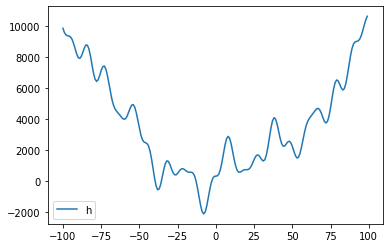

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Dec 19 16:27:55 2019
function h(x) 
@author: dahaeshin
"""
import math #importing math package
import random #importing random package
import matplotlib.pyplot as plt #importing mathplot package for graph

def errorFunction(x): #simple function to optimize by function 1
    return sum([15*math.sin(x[i]/5)**2 * 75*math.cos(x[i]/13) *  3*math.sin(x[i]/7)+ x[i]**2 + 300 for i in range(len(x))])
    '''   
    exercise 2: 
    expected minimum is -2141.79 and its corresponding x would be -7.93627
    '''
#a class of a computer agent, here also called 'particle'
class individualParticle:
    def __init__ (self,x0):
        self.individualPosition = [] #setting individual position with an empty list
        #exercise 1
        self.individualVelocity = []  #setting individual velocity with an empty list
        self.individualBestPosition = []  #setting individual best position with an empty list
        self.individualBestError = -1  #initializing individual best error as -1 
        self.individualError = -1 #initializing individual error as -1 
        
        for i in range(0, numStartingLocation): #for i starting from 0 to numStartingLocation
            self.individualVelocity.append(random.uniform(-1,1)) #individual velocity is appended with random x*y (=-1*1)
            self.individualPosition.append(x0[1]) #individual position is appened starting from the first position in x0
    
    #evaluate the current fitness of the computer agents
    def evaluate(self, costFunction): 
        self.individualError = costFunction(self.individualPosition) 
        # -1 = cos (individual position) f
        #for this individual position should be bounds of (⍺,0) or (-⍺,0)
        
        #the current position of the agent is compared with the indivudal best and updated if necessary
        if self.individualError < self.individualBestError or self.individualBestError == -1: 
            #if individual error is less than individual best error or is equal to -1
            self.individualBestPosition = self.individualPosition #invidual best position gets equal with individual position 
            self.individualBestError =  self.individualError #indiviudal best error gets equal with individual error
            
    #calculate the new agent's velocity
    def update_velocity(self, groupsBestPosition):
        w = 0.5 #inertia weight of previous velocity
        c1 = 1 #congnitive constant (distance from the individual's known best position)
        c2 = 2 #social constant(distance from the group's known best position)
        
        #random numbers to compensate for cognitive and social constants
        for i in range(0, numStartingLocation): #i in range of 0 to numStartingLocation
            r1 = random.random() #get random number
            r2 = random.random() #get random number
            
            #updating cognitive velocity and social velocity
            '''
            exercise 3:
            if a value is stuck at a certain local minimum and can not get out, 
            then particles with low velocity have difficulties finding the global minimum
            even after an increased number of iterations.
            I could solve this by creating a bias on the code with a number that is not to big or small
            Such as number '2' and added it for the cognitiveVelocity and socialVelocity
            '''
            cognitiveVelocity = (c1 * r1 * (self.individualBestPosition[i] - self.individualPosition[i])) + 2 #cognitiveVelocity + 2
            socialVelocity = (c2 * r2 * (groupsBestPosition[i] - self.individualPosition[i])) + 2 #socialVelocity + 2
            self.individualVelocity[i] = w * self.individualVelocity[i] + cognitiveVelocity + socialVelocity #then individualVelocity is summation of all the values above
        
    #update the position of each agent based on the new velocity updates
    def positionUpdate(self, bounds):
        for i in range(0, numStartingLocation): #for i in range of 0 to numStartingLocation
            self.individualPosition[i] = self.individualPosition[i] + self.individualVelocity[i] #indiviidualpostition is individual position plus individual velocity
            #compensate maximum position?
            if self.individualPosition[i] > bounds[i][1]: #if a position is bigger then the bound
                self.individualPosition[i] = bounds[i][1] #it is substituted to the bound
            #compensate minimum position?
            if self.individualPosition[i] < bounds[i][0]: #if a position is smaller then the bound
                self.individualPosition[i] = bounds[i][0] #it is substituted to the bound
                
def particleSwarmOptimization(costFunction, x0, bounds, num_particles, maxiter): 
    #initialize the swarm
    global numStartingLocation #making numStartingLocation global in order to be able to use it outside the function
    numStartingLocation = len(x0) #starting location of the number
    print(numStartingLocation) #printingout the numStartingLocation
    bestGroupError = -1 #initalize the best group error as -1
    groupsBestPosition = [] #making an empty list for the groups best position
    swarm = [] #making an empty list for the groups best postition
    
    print("num_particles:", num_particles) #printing out the num particles
        
    for i in range(0, num_particles): #i in range of 0 to num particles
        swarm.append(individualParticle(x0)) #append the lisit of individual particle
        
    #loop to start the optimization process
    for i in range(0,maxiter): #i in range of 0 to maxiter
        #evaluate each agent's fitness
        for j in range(0,num_particles): #i in range of 0 to num particles
            swarm[j].evaluate(costFunction) #for swarm in position of [j] evaluate the cos function
                
            #which agent has the best position (minimum error) in the swarm?
            if swarm[j].individualError < bestGroupError or bestGroupError == -1: #if swarm in position of [j] is smaller then the best group error or best group error is -1
                groupsBestPosition = list(swarm[j].individualPosition) #groups best position is list of individiual position of swarm in position of [j]
                bestGroupError = float(swarm[j].individualError) #best group error is a float of individual error of swarm in position of [j]
        #update velocities and positions inside the swarm      
        for j in range(0, num_particles): #i in range of 0 to num particles
            swarm[j].update_velocity(groupsBestPosition) #update swarm [j] position with velocity of groups best position
            swarm[j].positionUpdate(bounds) #update swarm [j] position with bounds
            
        for j in range(0, len(groupsBestPosition)): #i in range of 0 to groups best position
            print(groupsBestPosition[j]) #print out the groups best position 

    #print the final results with error
    print('After running the swarm of computer agents, the groups\'s best position is ' +
          str(groupsBestPosition) + " with an error of " + str(bestGroupError)) 
            
initialStartingPosition = [-15,15] # initial starting location [x1,x2...]
#minMaxBounds = [(-30,30), (-100,1500)]
minMaxBounds = [(-100,100), (-100,100)] # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
'''
exercise 4:
All real numbers are the possible solution space
Local munimum exists more than one, however the global minum is at x = -7.93627
The minimum value is -2141.79, but there is no maximum value.
'''
particleSwarmOptimization(errorFunction, initialStartingPosition, minMaxBounds, num_particles = 150, maxiter = 30) #maxiter is the iteration
x = [i for i in range(-100,100)] #setting x for the graph
y = [15*math.sin(x[i]/5)**2 * 75*math.cos(x[i]/13) *  3*math.sin(x[i]/7)+ x[i]**2 + 300 for i in range(len(x))] #setting y for the graph
line1, = plt.plot(x,y) #setting up the plot for the function
plt.legend([line1], "h(x)") #legend the function
plt.show() #showing the graph


In [ ]:
'''
f3
'''
import random # for random
import math # for math
import matplotlib.pyplot as plt # for graph

# simple function to optimize
def errorFunction(x):
      return sum([15*math.sin(x[i]/5)**2 * 75*math.cos(x[i]/13) *  3*math.sin(x[i]/7)+ x[i]**2 + 300 for i in range(len(x))]) # formula of h(x) (function3)

# A class of a computer agent, here also called 'particle'
class individualParticle:
  def __init__ (self, x0):
    self.individualPosition = []  # initializing individualposition
    self.individualVelocity = []  # initializing individualVelocity with an empty list
    self.individualBestPosition = []  # initializing individualBestPosition with an empty list
    self.individualBestError = -1  # initializing individualBestError as -1 
    self.individualError = -1 # initializing individualError as -1 
    # Exercise 

    for i in range(0, numStartingLocation): # for i starting from 0 to numStartingLocation
      self.individualVelocity.append(random.uniform(-1,1)) # individual velocity append with random 
      self.individualPosition.append(x0[1]) # individual position appended starting from initial position from x0
  
  # Evaluate the current fitness of computer agents
  def evaluate(self, costFunction): 
    self.individualError = costFunction(self.individualPosition)

    if self.individualError < self.individualBestError or self.individualBestError == -1: # if individual error < individualbesterror or is -1
      
      self.individualBestPosition = self.individualPosition # invidualbestposition assigns with individualposition 
      self.individualBestError =  self.individualError # indiviudalbesterror assign with individualerror

  # calculate the new agent's velocity
  def update_velocity(self, groupsBestPosition):
    w = 0.5 # inertia weight of previous velocity
    c1 = 1 # congnitive constant (distance from the individual's known best position)
    c2 = 2 # social constant(distance from the group's known best position)
 
    # random numbers to compensate for cognitive and social constants
    for i in range(0, numStartingLocation): #i in range of 0 to numStartingLocation
      r1 = random.random() # get random number for r1
      r2 = random.random() # get random number for r2
      # Updating cognitive velocity and social velocity
      cognitiveVelocity = (c1 * r1 * (self.individualBestPosition[i] - self.individualPosition[i])) + 1 #cognitiveVelocity + 1
      socialVelocity = (c2 * r2 * (groupsBestPosition[i] - self.individualPosition[i])) + 1 #socialVelocity + 1
      self.individualVelocity[i] = w * self.individualVelocity[i] + cognitiveVelocity + socialVelocity # then individualVelocity position [i] is weight times indiviudalvelocity[i] plus the values above

  # Update the position of each agent based on the new velocity updates
  def positionUpdate(self, bounds):
    for i in range(0, numStartingLocation): # for i in range of 0 to numStartingLocation
      self.individualPosition[i] = self.individualPosition[i] + self.individualVelocity[i] # assign individualpostition to individual position plus individual velocity
      # Compensate maximum position?
      if self.individualPosition[i] > bounds[i][1]: # if a position > the bound, substitutes it with the bound[i][1]
        self.individualPosition[i] = bounds[i][1] 
      # Compensate minimum position?
      if self.individualPosition[i] < bounds[i][0]: # if a position < the bound, substitutes it with the bound[i][0]
        self.individualPosition[i] = bounds[i][0] 
              

def particleSwarmOptimization(costFunction, x0, bounds, num_particles, maxiter): 
    # Initialize the swarm
    global numStartingLocation # making numStartingLocation global, accessible anywhwere
    numStartingLocation = len(x0) # starting location of the number
    print(numStartingLocation) 
    bestGroupError = -1 # initalize the best group error with -1
    groupsBestPosition = [] # making an empty list for the groups best position
    swarm = [] # making an empty list for swarms
    
    print("num_particles:", num_particles) #printing out the num particles
        
    for i in range(0, num_particles): # j in range of 0 to num_particles
        swarm.append(individualParticle(x0)) #append the lisit of individual particle
        
    # loop to start the optimization process
    for i in range(0,maxiter): # i in range of 0 to maxiter (defined later)
        # evaluate agent fitness
        for j in range(0,num_particles): # j in range of 0 to num_particles
            swarm[j].evaluate(costFunction) # swarm position [j] evaluate the costfunction
                
            #which agent has the best position (minimum error) in the swarm?
            if swarm[j].individualError < bestGroupError or bestGroupError == -1: #if swarm position [j] is < bestgrouperror/bestgrouperror is = -1
                groupsBestPosition = list(swarm[j].individualPosition) # groupsbestposition is an array list of individiual position of swarm in position [j]
                bestGroupError = float(swarm[j].individualError) # bestgrouperror is a number(float) of individualerror of swarm in position [j]
        # Update velocities and positions inside the swarm       
        for j in range(0, num_particles): # J in range of 0 to num_articles
            swarm[j].update_velocity(groupsBestPosition) # update swarm in position [j] with velocity of groupsbestposition
            swarm[j].positionUpdate(bounds) # update swarm in position [j] position with bounds
            
        for j in range(0, len(groupsBestPosition)): # i in range of 0 to lengthof groups best position
            print(groupsBestPosition[j]) # print groupsbestposition 

    #print the final results with error
    print('After running the swarm of computer agents, the groups\'s best position is ' +
          str(groupsBestPosition) + " with an error of " + str(bestGroupError)) 
'''
def particleSwarmOptimization(costFunction, x0, bounds, num_particles, maxiter): 
    # Initialize the swarm
    global numStartingLocation # making numStartingLocation global, accessible anywhwere
    numStartingLocation = len(x0) # starting location of the number
    print(numStartingLocation) 
    bestGroupError = -1 # initalize the best group error with -1
    groupsBestPosition = [] # making an empty list for the groups best position
    swarm = [] # making an empty list for swarms
    
        
    for i in range(0, num_particles): #i in range of 0 to num particles
        swarm.append(individualParticle(x0)) #append the lisit of individual particle
        
    # loop to start the optimization process
    for i in range(0,maxiter): # i in range of 0 to maxiter (defined later)
        #evaluate each agent's fitness
        for j in range(0,num_particles): # j in range of 0 to num_particles
            swarm[j].evaluate(costFunction) # swarm position [j] evaluate the costfunction
                
            # which agent has the best position (minimum error) in the swarm?
            if swarm[j].individualError < bestGroupError or bestGroupError == -1: #if swarm position [j] is < bestgrouperror/bestgrouperror is = -1
                groupsBestPosition = list(swarm[j].individualPosition) # groupsbestposition is an array list of individiual position of swarm in position [j]
                bestGroupError = float(swarm[j].individualError) # bestgrouperror is a number(float) of individualerror of swarm in position [j]
        # Update velocities and positions inside the swarm    
        for j in range(0, num_particles): # J in range of 0 to num_articles
            swarm[j].update_velocity(groupsBestPosition) # update swarm in position [j] with velocity of groupsbestposition
            swarm[j].positionUpdate(bounds) # update swarm in position [j] position with bounds
            
        for j in range(0, len(groupsBestPosition)): # i in range of 0 to lengthof groups best position
            print(groupsBestPosition[j]) # print groupsbestposition 
            
    print("num_particles is -->", num_particles) 
    # print results with error
    print('After running the swarm of computer agents, the groups\'s best position is ' +
          str(groupsBestPosition) + " with an error of " + str(bestGroupError)) 
   ''' 
initialStartingPosition = [-15,15] # initial location of x1,x2
minMaxBounds = [(-100,100), (-100,100)] # minmax bounds (x1_min,x1_max),(x2_min,x2_max)
particleSwarmOptimization(errorFunction, initialStartingPosition, minMaxBounds, 
                          num_particles = 150, maxiter = 30) # maxiter is the number of maximu, iteration


2
num_particles: 150
15
15
15.295186196571823
15.395078828183202
15.295850173601877
15.323931829223671
15.333537908628188
15.362648291381701
15.333537908628188
15.362648291381701
15.333537908628188
15.362648291381701
15.333537908628188
15.362648291381701
15.333537908628188
15.362648291381701
15.333537908628188
15.362648291381701
15.333537908628188
15.362648291381701
15.333537908628188
15.362648291381701
15.333537908628188
15.362648291381701
15.333537908628188
15.362648291381701
15.333537908628188
15.362648291381701
15.333537908628188
15.362648291381701
15.333537908628188
15.362648291381701
15.333537908628188
15.362648291381701
15.579865999024578
-1.0652159114677282
-12.053476855946698
-7.061897993755657
-5.284327060445396
-8.499908395991323
-5.284327060445396
-8.499908395991323
-5.284327060445396
-8.499908395991323
-8.782120493483925
-9.011328956645485
-8.782120493483925
-9.011328956645485
-8.782120493483925
-9.011328956645485
-8.782120493483925
-9.011328956645485
-8.782120493483925
-9

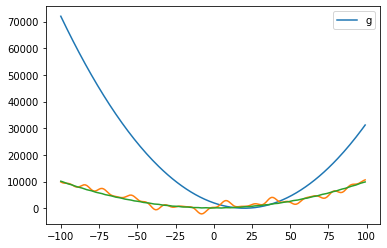

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Dec 19 16:27:55 2019
function h(x) for 
@author: dahaeshin
"""
import math #importing maath package
import random #importing random package
import matplotlib.pyplot as plt #importing math package

def errorFunction(x): #simple function to optimize by function 1
    return sum([15*math.sin(x[i]/5)**2 * 75*math.cos(x[i]/13) *  3*math.sin(x[i]/7)+ x[i]**2 + 300 for i in range(len(x))])
    return sum([50 * math.sin(x[i])+ (x[i])**2 + 100 for i in range(len(x))]) #exercise3
    return sum([5 * (x[i] - 20)**2 for i in range(len(x))]) # expected minimum is 0 and its corresponding x would be 20 

#a class of a computer agent, here also called 'particle'
class individualParticle:
    def __init__ (self,x0):
        self.individualPosition = [] #setting individual position with an empty list
        self.individualVelocity = []  #setting individual velocity with an empty list
        self.individualBestPosition = []  #setting individual best position with an empty list
        self.individualBestError = -1  #initializing individual best error as -1 
        self.individualError = -1 #initializing individual error as -1 
        
        for i in range(0, numStartingLocation): #for i starting from 0 to numStartingLocation
            self.individualVelocity.append(random.uniform(-1,1)) #individual velocity is appended with random x*y (=-1*1)
            self.individualPosition.append(x0[1]) #individual position is appened starting from the first position in x0
    
    #evaluate the current fitness of the computer agents
    def evaluate(self, costFunction): 
        self.individualError = costFunction(self.individualPosition) 
        # -1 = cos (individual position) f
        #for this individual position should be bounds of (⍺,0) or (-⍺,0)
        
        #the current position of the agent is compared with the indivudal best and updated if necessary
        if self.individualError < self.individualBestError or self.individualBestError == -1: 
            #if individual error is less than when, 
            #(if individual error is not -1 and less than that) or (if individual best error is -1)
            self.individualBestPosition = self.individualPosition #invidual best position gets equal with individual position 
            self.individualBestError =  self.individualError #indiviudal best error gets equal with individual error
            
    #calculate the new agent's velocity
    def update_velocity(self, groupsBestPosition):
        w = 1.0 #inertia weight of previous velocity
        c1 = 1 #congnitive constant (distance from the individual's known best position)
        c2 = 2 #social constant(distance from the group's known best position)
        
        #random numbers to compensate for cognitive and social constants
        #random.seed(20)
        for i in range(0, numStartingLocation):
            r1 = random.random()
            r2 = random.random()
            
            #updating cognitive velocity and social velocity
            cognitiveVelocity = c1 * r1 * (self.individualBestPosition[i] - self.individualPosition[i])
            socialVelocity = c2 * r2 * (groupsBestPosition[i] - self.individualPosition[i])
            self.individualVelocity[i] = w * self.individualVelocity[i] + cognitiveVelocity + socialVelocity
        
    #update the position of each agent based on the new velocity updates
    def positionUpdate(self, bounds):
        for i in range(0, numStartingLocation):
            self.individualPosition[i] = self.individualPosition[i] + self.individualVelocity[i]
            #compensate maximum position?
            if self.individualPosition[i] > bounds[i][1]:
                self.individualPosition[i] = bounds[i][1]
            #compensate minimum position?
            if self.individualPosition[i] < bounds[i][0]:
                self.individualPosition[i] = bounds[i][0]
                
def particleSwarmOptimization(costFunction, x0, bounds, num_particles, maxiter):
    #initialize the swarm
    global numStartingLocation
    numStartingLocation = len(x0)
    print(numStartingLocation)
    bestGroupError = -1
    groupsBestPosition = []
    swarm = []
    
    print("num_particles:", num_particles)
        
    for i in range(0, num_particles):
        swarm.append(individualParticle(x0))
        
    #loop to start the optimizatino process
    for i in range(0,maxiter):
        #evaluate each agent's fitness
        for j in range(0,num_particles):
            swarm[j].evaluate(costFunction)
                
            #which agent has the best position (minimum error) in the swarm?
            if swarm[j].individualError < bestGroupError or bestGroupError == -1:
                groupsBestPosition = list(swarm[j].individualPosition)
                bestGroupError = float(swarm[j].individualError)
        #update velocities and positions inside the swarm      
        for j in range(0, num_particles):
            swarm[j].update_velocity(groupsBestPosition)
            swarm[j].positionUpdate(bounds)
            
        for j in range(0, len(groupsBestPosition)):
            print(groupsBestPosition[j])

    #print the final results with error
    print('After running the swwarm of computer agents, the groups\'s best position is ' +
          str(groupsBestPosition) + " with an error of " + str(bestGroupError))
            
initialStartingPosition = [-15,15] # initial starting location [x1,x2...]
#minMaxBounds = [(-30,30), (-100,1500)]
minMaxBounds = [(-10000,10000), (-10000,10000)] # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
particleSwarmOptimization(errorFunction, initialStartingPosition, minMaxBounds, num_particles = 150, maxiter = 30) #maxiter is the iteration
x = [i for i in range(-100,100)] #setting x for the graph
y1 = [5 * (x[i] - 20)**2 for i in range(len(x))]
y2 = [15*math.sin(x[i]/5)**2 * 75*math.cos(x[i]/13) *  3*math.sin(x[i]/7)+ x[i]**2 + 300 for i in range(len(x))]
y3 = [50 * math.sin(x[i])+ (x[i])**2 + 100 for i in range(len(x))]
line1, = plt.plot(x,y1)
line2, = plt.plot(x,y2)
line3, = plt.plot(x,y3)

plt.legend([line1], "g(x)")
plt.show()

2
num_particles: 150
15
15
15.436712635784962
15.355778511444571
15.39300025842594
15.384944892689775
15.391493049543804
15.351295136659388
15.37416256204587
15.36885667144084
15.365703498116444
15.34998817191584
15.365703498116444
15.34998817191584
15.365703498116444
15.34998817191584
15.358038527771466
15.35652966461127
15.358038527771466
15.35652966461127
15.358038527771466
15.35652966461127
15.358038527771466
15.35652966461127
15.356072413386912
15.35510991679517
15.356072413386912
15.35510991679517
15.356072413386912
15.35510991679517
15.356072413386912
15.35510991679517
15.356072413386912
15.35510991679517
15.355886854541303
15.35570824675678
15.355886854541303
15.35570824675678
15.355886854541303
15.35570824675678
15.355909574327587
15.355733949341522
15.355919110806807
15.356051627185986
15.355976258819483
15.356023486747644
15.356007400264897
15.35596285818332
15.355958836816697
15.355994306778054
15.355958836816697
15.355994306778054
15.355958836816697
15.355994306778054
15.3

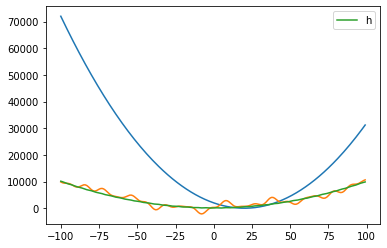

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Dec 22 02:09:13 2021

@author: angelo
"""

import math #importing maath package
import random #importing random package
import matplotlib.pyplot as plt #importing math package

def errorFunction(x): #simple function to optimize by function 1
    return sum([15*math.sin(x[i]/5)**2 * 75*math.cos(x[i]/13) *  3*math.sin(x[i]/7)+ x[i]**2 + 300 for i in range(len(x))])
    return sum([50 * math.sin(x[i])+ (x[i])**2 + 100 for i in range(len(x))]) #exercise3
    return sum([5 * (x[i] - 20)**2 for i in range(len(x))]) # expected minimum is 0 and its corresponding x would be 20 

#a class of a computer agent, here also called 'particle'
class individualParticle:
    def __init__ (self,x0):
        self.individualPosition = [] #setting individual position with an empty list
        self.individualVelocity = []  #setting individual velocity with an empty list
        self.individualBestPosition = []  #setting individual best position with an empty list
        self.individualBestError = -1  #initializing individual best error as -1 
        self.individualError = -1 #initializing individual error as -1 
        
        for i in range(0, numStartingLocation): #for i starting from 0 to numStartingLocation
            self.individualVelocity.append(random.uniform(-1,1)) #individual velocity is appended with random x*y (=-1*1)
            self.individualPosition.append(x0[1]) #individual position is appened starting from the first position in x0
    
    #evaluate the current fitness of the computer agents
    def evaluate(self, costFunction): 
        self.individualError = costFunction(self.individualPosition) 
        # -1 = cos (individual position) f
        #for this individual position should be bounds of (⍺,0) or (-⍺,0)
        
        #the current position of the agent is compared with the indivudal best and updated if necessary
        if self.individualError < self.individualBestError or self.individualBestError == -1: 
            #if individual error is less than when, 
            #(if individual error is not -1 and less than that) or (if individual best error is -1)
            self.individualBestPosition = self.individualPosition #invidual best position gets equal with individual position 
            self.individualBestError =  self.individualError #indiviudal best error gets equal with individual error
            
    #calculate the new agent's velocity
    def update_velocity(self, groupsBestPosition):
        w = 0.5 #inertia weight of previous velocity
        c1 = 1 #congnitive constant (distance from the individual's known best position)
        c2 = 2 #social constant(distance from the group's known best position)
        
        #random numbers to compensate for cognitive and social constants
        #random.seed(20)
        for i in range(0, numStartingLocation):
            r1 = random.random()
            r2 = random.random()
            
            #updating cognitive velocity and social velocity
            cognitiveVelocity = c1 * r1 * (self.individualBestPosition[i] - self.individualPosition[i])
            socialVelocity = c2 * r2 * (groupsBestPosition[i] - self.individualPosition[i])
            self.individualVelocity[i] = w * self.individualVelocity[i] + cognitiveVelocity + socialVelocity
        
    #update the position of each agent based on the new velocity updates
    def positionUpdate(self, bounds):
        for i in range(0, numStartingLocation):
            self.individualPosition[i] = self.individualPosition[i] + self.individualVelocity[i]
            #compensate maximum position?
            if self.individualPosition[i] > bounds[i][1]:
                self.individualPosition[i] = bounds[i][1]
            #compensate minimum position?
            if self.individualPosition[i] < bounds[i][0]:
                self.individualPosition[i] = bounds[i][0]
                
def particleSwarmOptimization(costFunction, x0, bounds, num_particles, maxiter):
    #initialize the swarm
    global numStartingLocation
    numStartingLocation = len(x0)
    print(numStartingLocation)
    bestGroupError = -1
    groupsBestPosition = []
    swarm = []
    
    print("num_particles:", num_particles)
        
    for i in range(0, num_particles):
        swarm.append(individualParticle(x0))
        
    #loop to start the optimizatino process
    for i in range(0,maxiter):
        #evaluate each agent's fitness
        for j in range(0,num_particles):
            swarm[j].evaluate(costFunction)
                
            #which agent has the best position (minimum error) in the swarm?
            if swarm[j].individualError < bestGroupError or bestGroupError == -1:
                groupsBestPosition = list(swarm[j].individualPosition)
                bestGroupError = float(swarm[j].individualError)
        #update velocities and positions inside the swarm      
        for j in range(0, num_particles):
            swarm[j].update_velocity(groupsBestPosition)
            swarm[j].positionUpdate(bounds)
            
        for j in range(0, len(groupsBestPosition)):
            print(groupsBestPosition[j])

    #print the final results with error
    print('After running the swwarm of computer agents, the groups\'s best position is ' +
          str(groupsBestPosition) + " with an error of " + str(bestGroupError))
            
initialStartingPosition = [-15,15] # initial starting location [x1,x2...]
minMaxBounds = [(-3000,300), (-10000,10000)]
#minMaxBounds = [(-10000,10000), (-10000,10000)] # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
particleSwarmOptimization(errorFunction, initialStartingPosition, minMaxBounds, num_particles = 150, maxiter = 30) #maxiter is the iteration
x = [i for i in range(-100,100)] #setting x for the graph
y1 = [5 * (x[i] - 20)**2 for i in range(len(x))]
y2 = [15*math.sin(x[i]/5)**2 * 75*math.cos(x[i]/13) *  3*math.sin(x[i]/7)+ x[i]**2 + 300 for i in range(len(x))]
y3 = [50 * math.sin(x[i])+ (x[i])**2 + 100 for i in range(len(x))]
line1, = plt.plot(x,y1)
line2, = plt.plot(x,y2)
line3, = plt.plot(x,y3)

plt.legend([line1], "f(x)")
plt.legend([line2], "g(x)")
plt.legend([line3], "h(x)")
plt.show()